# Data visualization

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import plotting_tools
import utils
import symb_reg as sr
import matplotlib.pyplot as plt

from deap import tools

import numpy as np
import pickle

## Load data

In [2]:
data_paths1 = ('data/f2_1e7_evals_exact', 
               'data/f2_1e7_evals_coev_32predsz', 'data/f2_1e7_evals_coev_64predsz')
data_paths2 = ('data/f2_3.5e7_evals_coev_32predsz','data/f2_3.5e7_evals_exact',
               'data/f2_3.5e7_evals_dynamic', 'data/f2_3.5e7_evals_static')
data_paths3 = ('data/f1_3.5e7_evals_exact', 'data/f1_3.5e7_evals_coev_32predsz')
exp1 = list(map(utils.LoadedLogs, data_paths1)), ['exact', 'coev, size 32', 'coev, size 64']
exp2 = list(map(utils.LoadedLogs, data_paths2)), ['coev', 'exact', 'dynamic', 'static']
exp3 = list(map(utils.LoadedLogs, data_paths3)), ['exact', 'coev_32']
exp4 = [utils.LoadedLogs('data/f2_1e7_evals_coev_8predsz')], ['coev, size 8']

In [3]:
data = np.load(data_paths1[0] + '/dataset.npz')
trn_x, trn_y = data['trn_x'], data['trn_y']
exp, names = exp2

## Plot performance

<IPython.core.display.Javascript object>


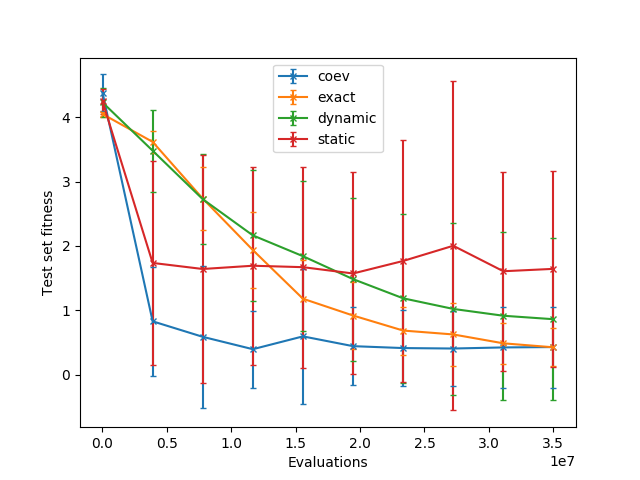

/home/honza/Documents/school/fpgp/plotting_tools.py:80: UserWarning: 1 values were ignored for being too high
  warnings.warn(f'{vals[vals > ignore_tresh].size} values were ignored for being too high')


In [4]:
plotting_tools.compare_performance(exp, 'evals', 'test_set_f', method_names=names, ignore_tresh=30, xlabel='Evaluations', ylabel='Test set fitness')
plt.show()

In [ ]:
# select runs
runs = list(list(exp)[1])

## Histogram of test set fitnesses

In [ ]:
plt.hist([l[-1]['test_set_f'] for l in runs])
plt.show()

In [ ]:
sorted_logs = sorted(runs, key=lambda x: x[-1]['test_set_f'])
# select run you want to analyze
log = sorted_logs[1] # best run

## Performance of the run

In [ ]:
for l in sorted_logs:
    plotting_tools.show_performance(l, 'evals', 'test_set_f')
    print(l.select('test_set_f')[-1])

## Found solution

In [ ]:
fig, ax = plt.subplots()
ax.plot(trn_x, log[-1]['best_sol_vals'], label='best solution found')
ax.plot(trn_x, trn_y, ls=' ', marker='o', ms='1', label='target function')
ax.legend()
plt.show()

## Histogram of used predictors

In [ ]:
plotting_tools.predictor_histogram(trn_x, trn_y, log)
plt.show()

## Animation of the progress of the run

In [ ]:
anim = plotting_tools.visualize_run(trn_x, trn_y, log, freq=50, step=10)
plt.show()